### Abstract 
The aim of this exploration of the Palmer Penguins dataset is to gain insight into the dataset through predictive classification. This exploration involves constructing visualizations of the data using seaborn and creating informative summary tables using pandas. By testing various combinations of models through a reproducible process, three key features are able to be identified. Out of the three features, I found that the combination of 1 qualitative feature: Clutch Completion, and 2 quantitative features: Culmen Length and Culmen Depth, were the most effective to reach 100% testing classification accuracy using a Decision Tree Model. The evaluation phase provides a visual representation of the models behavior by showing the decision regions of the trained decision tree model. Through this process, we gain a comprehensive understanding of the Palmer Penguins dataset and demonstrate the effectiveness of a trained decision tree model in accurately classifying Palmer Penguin data. 

In [10]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

We can take a peek at the data to get a better idea of where to start. 

In [11]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


### Data Preparation

In order for smooth application of our data into the models we will later use to predict penguin species classification, we must prepare the data. In this case, categorical data must be one-hot-encoded. 

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

### Explore 

To gain a better understanding of our data, we can explore it via various methods, by constructing summary tables and visualizations. 

In [13]:
#all only have 1 egg stage, so egg stage doesn't matter
train.groupby(["Species", "Stage"]).aggregate({'Body Mass (g)' : 'mean'})

#testing different summary tables 
AvgBodyMass = train.groupby(["Species", "Island", "Sex"]).aggregate({'Body Mass (g)' : 'mean'})
AvgCulmen = train.groupby(["Species", "Island", "Sex"]).aggregate({'Culmen Length (mm)' : 'mean', 'Culmen Depth (mm)' : 'mean'})
AvgFlipper = train.groupby(["Species", "Island", "Sex"]).aggregate({'Flipper Length (mm)' : 'mean'})
#AvgCulmen2 is a table of the features I eventually found to be the best 
AvgCulmen2 = train.groupby(["Species", "Clutch Completion"]).aggregate({'Culmen Length (mm)' : 'mean', 'Culmen Depth (mm)' : 'mean'})


print("Average Measurements by Species, Island, and Sex")
print(AvgCulmen2)


Average Measurements by Species, Island, and Sex
                                                             Culmen Length (mm)  \
Species                                   Clutch Completion                       
Adelie Penguin (Pygoscelis adeliae)       No                          39.041667   
                                          Yes                         38.962617   
Chinstrap penguin (Pygoscelis antarctica) No                          49.040000   
                                          Yes                         48.780851   
Gentoo penguin (Pygoscelis papua)         No                          46.485714   
                                          Yes                         47.118889   

                                                             Culmen Depth (mm)  
Species                                   Clutch Completion                     
Adelie Penguin (Pygoscelis adeliae)       No                         18.225000  
                                          Y

###Visualize

Text(0.5, 1.0, 'Scatterplot with Species')

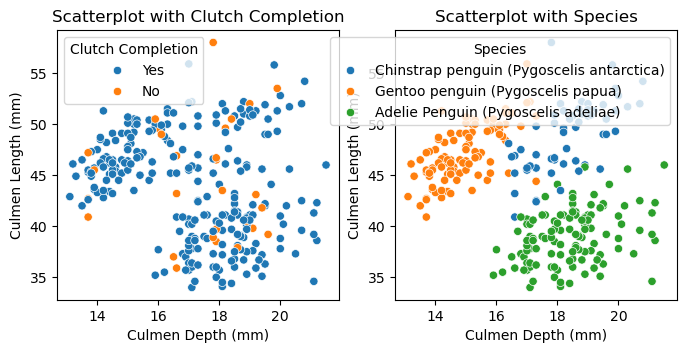

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize = (8, 3.5))


p1 = sns.scatterplot(train, x = "Culmen Depth (mm)", y = "Culmen Length (mm)", hue = "Clutch Completion", ax = ax[0])
p2 = sns.scatterplot(train, x = "Culmen Depth (mm)", y = "Culmen Length (mm)", hue = "Species", ax = ax[1])

ax[0].set_title("Culmen Depth & Length (mm) by Clutch Completion")
ax[1].set_title("Culmen Depth & Length (mm) by Species")

## Figure Findings 

Various summary tables and visualizations were tested, aiming to determine the most effective presentation of the Palmer Penguins dataset. Initially different grouping criteria and variables were considered, such as species, island, sex, clutch completion, culmen depth and length, body mass, and flipper length. Ultimately I decided to come back and choose the summary table and visualizations that reflected the variables I later found to have the highest predictive accuracy: Culmen Depth, Culmen Length, and Clutch Completion. Summary tables were created using pandas.groupby().aggregate. From the summary tables we observe that among different species, Culmen Length varies to a larger degree than Culmen Depth does. Upon a glance of the summary table, it is hard to see if clutch completion and culmen characteristics are correlated. In the first visualization on the right, we can see the penguins depicted by virtue of the respective culmen length and depth, colored by the Clutch Completion. We observe a relatively uniform distribution of clutch completion- there does not seem to be an immediate observable relationship between the three. My next visualization shows the same axes of Culmen Depth and Length, this time however colored by species. In this figure, we notice clear species groupings, corresponding to their Culmen Depth-Length relationship. 

## Find the Best Features for Prediction

In order to ensure our model has the highest classification accuracy possible, we need to select features that are more indicative of the species group a penguin belongs to. By testing every combination of features, we are able to find the three that result in the highest training set accuracy. We find that there are multiple 3-feature sets with 100% training set classification accuracy. 

In [ ]:
from itertools import combinations

from sklearn.tree import DecisionTreeClassifier

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Sex", "Island"]
all_quant_cols = ['Flipper Length (mm)','Culmen Length (mm)', 'Culmen Depth (mm)']

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    print(cols)
    # you could train models and score them here, keeping the list of 
    # columns for the model that has the best score. 
    #DT = DecisionTreeClassifier()
    #DT.fit(X_train[cols], y_train)
    #print(DT.score(X_train[cols], y_train))

['Clutch Completion_No', 'Clutch Completion_Yes', 'Flipper Length (mm)', 'Culmen Length (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Flipper Length (mm)', 'Culmen Depth (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Flipper Length (mm)', 'Culmen Length (mm)']
['Flipper Length (mm)', 'Culmen Depth (mm)']
['Culmen Length (mm)', 'Culmen Depth (mm)']
['Flipper Length (mm)', 'Culmen Length (mm)']
['Flipper Length (mm)', 'Culmen Depth (mm)']
['Culmen Length (mm)', 'Culmen Depth (mm)']


In order to narrow these feature-sets down to the single set that will be the most effective and give us not only 100% training set classificaiton accuracy but also 100% testing set classification accuracy, we repeat the process from earlier. Now operating on the testing set, we narrow down the 3-feature sets into one final best feature set: Clutch Completion, Culmen Length (mm), and Culmen Depth (mm). 

In [ ]:
#pretend we're numbering these from 1-9, look at testing accuracy for each one that has 1.0. 

tempCols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Clutch Completion_No', 'Clutch Completion_Yes']
DT = DecisionTreeClassifier()
DT.fit(X_train[tempCols], y_train)
print(DT.score(X_train[tempCols], y_train))

test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
DT.score(X_test[tempCols], y_test)


#1 0.97
#2 nope
#3 1.0 !!!  ['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)']
#4 0.97
#5 nope
#6 0.98
#7 0.98
#nope
#9 0.98

1.0


1.0

We check our cross-validation score, noting that a cross validation score of 94.5% is indicitive of future model generalizability.

In [ ]:
#cross-validation
from sklearn.model_selection import cross_val_score
cv_scores_DT = cross_val_score(DT, X_train, y_train, cv=5)
cv_scores_DT.mean()

0.9452488687782805

### Plotting Decision Regions

Finally, we can visualize these Decision Regions using matplotlib. 

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

In [ ]:
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Clutch Completion_No,Clutch Completion_Yes
0,40.9,16.6,False,True
1,49.0,19.5,False,True
2,50.0,15.2,False,True
3,45.8,14.6,False,True
4,51.0,18.8,False,True


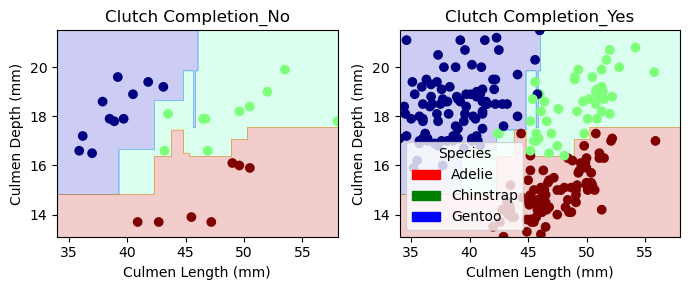

In [ ]:
#visualizing decision regions on train set 
plot_regions(DT, X_train[keepCols], y_train)

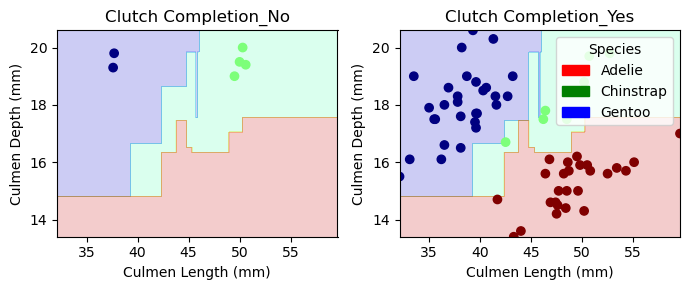

In [ ]:
#visualizing decision regions on test set
plot_regions(DT, X_test[keepCols], y_test)

### Confusion Matrix 

In [ ]:
#need to truncate X_test to have only the columns we're using to predict before doing confusion matrix
X_test = X_test[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Clutch Completion_No', 'Clutch Completion_Yes']]

In [ ]:
from sklearn.metrics import confusion_matrix

y_test_pred = DT.predict(X_test)
y_test_pred

C = confusion_matrix(y_test, y_test_pred)
C



array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]])

Since the trained model has 100% training and testing classifcation accuracy, the confusion matrix reflects the lack of classification errors. 

### Summary Discussion 

In conclusion, this exploration of the Palmer Penguins dataset has provided insights into the dataset through predictive classification. Through the construction of informative summary tables and visually appealing figures, we were able to uncover various patterns, trends, and relationships within the data. By systematically testing different combinations of both qualitative and quantitative features of the Palmer Penguins, I found the best combination of three features that yielded high classification accuracy. One qualitative feature, clutch completion, and two quantitative features, culmen length and culmen depth (mm). By employing scikit-learn's DecisionTreeClassifier, I trained a model on these features and achieved a classification accuracy of 100% on both the training and testing sets. This shows the importance of feature selection, model selection and evaluation in building accurate predictive models. Through this whole process, I gained a comprehensive understanding of the Palmer Penguins dataset and demonstrate the effectiveness of a trained model in accurately classifying Palmer Penguin data. From this process, I learned how important both the selection of the right features as well as the right model are. I learned that 100% training set classification accuracy does not guarantee 100% testing set classification accuracy, and how it is important to tweak the model to ensure that future uses beyond a training set maintain a high level of accuracy. I gained an appreciation of visualizations as a tool for greater understanding of initial data as well as the effect of models. I feel confident in future endeavors to explore, visualize, and predict data. 

